# Latent Consistency Models with ONNX and OpenVINO Execution Provider

Install required packages

In [1]:
%pip install -q "onnx==1.16.0"
%pip install -q "onnxruntime-openvino==1.18.0"
%pip install -q "optimum==1.19.1" "accelerate==0.33.0" "optimum-intel==1.16.1" "diffusers==0.27.2" "numpy==1.26.4" --extra-index-url https://download.pytorch.org/whl/cpu

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Ensure the path to OpenVINO DLLs are in your system PATH
import onnxruntime.tools.add_openvino_win_libs as utils
utils.add_openvino_libs_to_path()

Download the model and save it locally 

In [ ]:
!optimum-cli export onnx --model SimianLuo/LCM_Dreamshaper_v7 lcm_onnx

Select inference device for text-to-image generation

In [2]:
import ipywidgets as widgets
import openvino as ov

core = ov.Core()

device = widgets.Dropdown(
    options=core.available_devices + ["AUTO"],
    value="CPU",
    description="Device:",
    disabled=False,
)

device

Dropdown(description='Device:', options=('CPU', 'GPU', 'NPU', 'AUTO'), value='CPU')

Create ORTLatentConsistencyModelPipeline with OpenVINO Execution Provider for AI inference on the integrated GPU

In [4]:
from optimum.onnxruntime import ORTLatentConsistencyModelPipeline

pipeline = ORTLatentConsistencyModelPipeline.from_pretrained("lcm_onnx/", 
	provider="OpenVINOExecutionProvider", 
    provider_options={'device_type' : device.value,
	'cache_dir' : './temp/'})

Run AI inference on the integrated GPU 

  0%|          | 0/4 [00:00<?, ?it/s]

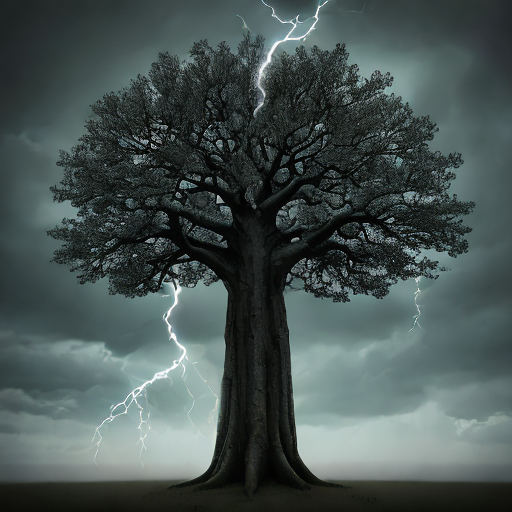

In [6]:
prompt = "tree with lightning in the background, 8k"
images = pipeline(prompt, num_inference_steps=4, guidance_scale=8.0, height=512, width=512).images[0]
images